In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import streamlit as st

In [14]:
pip install streamlit

In [2]:
# Load your dataset with explicit encoding and specify dtype
file_path = 'traffic prediction 2020-2022 new.csv'
dtype_specification = {'Year': str, 'Month': str, 'Day': str, 'Hour': str}  # Adjust the dtype specification as needed
df = pd.read_csv(file_path, encoding='ISO-8859-1', dtype=dtype_specification, low_memory=False)



In [3]:
# Convert 'Year', 'Month', 'Day', and 'Hour' columns to datetime
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
# Assuming 'speed' is the target variable
features = ['Datetime']
X = df[features].copy()  # Make a copy to avoid SettingWithCopyWarning
y = df['speed']

# Extract timestamp representation of datetime values
X['Timestamp'] = X['Datetime'].values.astype(np.int64) // 10**9

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X[['Timestamp']], y, test_size=0.2, random_state=42)

In [4]:
# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

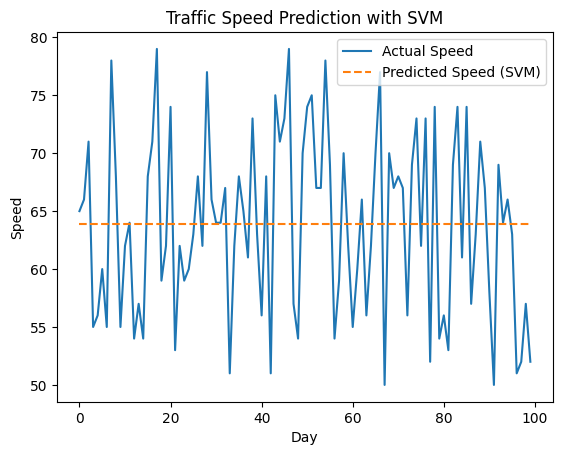

In [5]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import numpy as np

# Assuming 'X_test' represents the number of days or observations
num_days = 100  # Replace this with the actual number of days in your dataset
days = np.arange(num_days)  # Creating an array of days (e.g., 0, 1, 2, ...)

# Assuming 'y_test' represents the actual speed values for each day
# Replace 'y_test' with your actual speed data
y_test = np.random.randint(50, 80, size=num_days)  # Example random speed values

# Assuming 'svm_model' is already trained
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(days.reshape(-1, 1), y_test)  # Training on days (assuming days are the features)

# Generating predictions for the same range of days
predictions = svm_model.predict(days.reshape(-1, 1))

# Plotting against days
plt.plot(days, y_test, label='Actual Speed')
plt.plot(days, predictions, label='Predicted Speed (SVM)', linestyle='--')
plt.title("Traffic Speed Prediction with SVM")
plt.xlabel("Day")
plt.ylabel("Speed")
plt.legend()
plt.show()


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# تحميل البيانات الجغرافية
gdf = gpd.read_file('traffic prediction 2020-2022 new.csv')  # استبدال 'shapefile.shp' بمسار ملف البيانات الجغرافية الخاص بك

# عرض البيانات الجغرافية
print(gdf.head())


  Master Record Number  Year Month Day Weekend?  Hour Collision Type  \
0            902363382  2022     1   5  Weekday     0          2-Car   
1            902364268  2022     1   6  Weekday  1500          2-Car   
2            902364412  2022     1   6  Weekend  2300          2-Car   
3            902364551  2022     1   7  Weekend   900          2-Car   
4            902364615  2022     1   7  Weekend  1100          2-Car   

          Injury Type                         Primary Factor  \
0   No injury/unknown  OTHER (DRIVER) - EXPLAIN IN NARRATIVE   
1   No injury/unknown                  FOLLOWING TOO CLOSELY   
2  Non-incapacitating              DISREGARD SIGNAL/REG SIGN   
3  Non-incapacitating          FAILURE TO YIELD RIGHT OF WAY   
4   No injury/unknown          FAILURE TO YIELD RIGHT OF WAY   

       Reported_Location     Latitude     Longitude        speed geometry  
0             1ST & FESS  39.15920668  -86.52587356   28.4736938     None  
1          2ND & COLLEGE     3

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.87
Precision: 0.92
Recall: 0.83
F1 Score: 0.87
Confusion Matrix:
[[85  8]
 [18 89]]


In [13]:
import streamlit as st

st.markdown("Route Map")
st.title("Route map")

# Add a label to the text input
user_input = st.text_input("Enter your route:")

# Now you can use the user_input variable in your code
st.write("You entered:", user_input)
